In [1]:
include("fictplay.jl")
using Plots #use Plots package to draw the graph
gr()  #use GR in the backend

Plots.GRBackend()

# FictitiousPlay

## FictitiousPlay with decreasing gain

In [2]:
matching_pennies_bimatrix = Array{Float64}(undef, 2, 2, 2)
matching_pennies_bimatrix[:, 1, 1] = [1, -1]
matching_pennies_bimatrix[:, 1, 2] = [-1, 1]
matching_pennies_bimatrix[:, 2, 1] = [-1, 1]
matching_pennies_bimatrix[:, 2, 2] = [1, -1]
g = NormalFormGame(matching_pennies_bimatrix)

2×2 NormalFormGame{2,Float64}

In [3]:
fp = FictitiousPlay(g, (1,1))
println(fp.g)
println(fp.step_size)
println(fp.x)
println(fp.t)

2×2 NormalFormGame{2,Float64}
getfield(Main, Symbol("##5#8"))()
(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
1


In [4]:
play!(fp)

(Array{Float64,1}[[0.5, 0.5]], Array{Float64,1}[[1.0, 0.0]])

In [5]:
println(fp.g)
println(fp.step_size)
println(fp.x)
println(fp.t)

2×2 NormalFormGame{2,Float64}
getfield(Main, Symbol("##5#8"))()
(Array{Float64,1}[[0.5, 0.5]], Array{Float64,1}[[1.0, 0.0]])
2


In [6]:
initialize!(fp,(1,1))

(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])

In [7]:
println(fp.g)
println(fp.step_size)
println(fp.x)
println(fp.t)

2×2 NormalFormGame{2,Float64}
getfield(Main, Symbol("##5#8"))()
(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
1


In [8]:
for t in 1:10
    println(fp.x)
    play!(fp)
end

(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.5, 0.5]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.333333, 0.666667]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.25, 0.75]], Array{Float64,1}[[0.75, 0.25]])
(Array{Float64,1}[[0.2, 0.8]], Array{Float64,1}[[0.6, 0.4]])
(Array{Float64,1}[[0.166667, 0.833333]], Array{Float64,1}[[0.5, 0.5]])
(Array{Float64,1}[[0.142857, 0.857143]], Array{Float64,1}[[0.428571, 0.571429]])
(Array{Float64,1}[[0.25, 0.75]], Array{Float64,1}[[0.375, 0.625]])
(Array{Float64,1}[[0.333333, 0.666667]], Array{Float64,1}[[0.333333, 0.666667]])
(Array{Float64,1}[[0.4, 0.6]], Array{Float64,1}[[0.3, 0.7]])


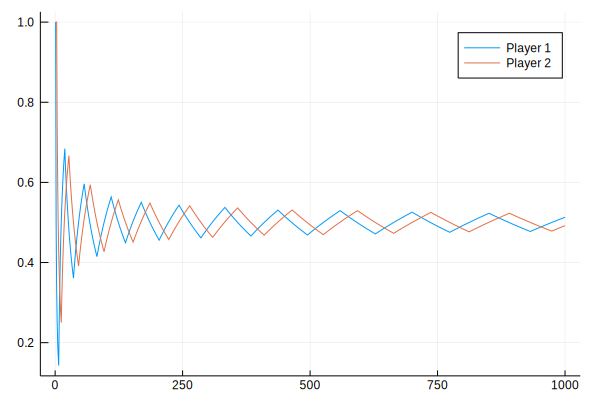

In [9]:
initialize!(fp,(1,1))

ts_length = 1000
assessment_series = Array{Real}(undef, ts_length, 2)
for t in 1:ts_length
    for i in 1:2
        assessment_series[t, i] = fp.x[i][1][1]
    end
    play!(fp)
end
assessment = [assessment_series[:,1], assessment_series[:,2]]
labels = ["Player 1", "Player 2"]
plot(assessment, label=labels)

In [10]:
shapley_game = Array{Int}(undef, 3, 3, 2)
shapley_game[:, 1, 1] = [0, 0, 1]
shapley_game[:, 2, 1] = [1, 0, 0]
shapley_game[:, 3, 1] = [0, 1, 0]
shapley_game[:, 1, 2] = [0, 1, 0]
shapley_game[:, 2, 2] = [0, 0, 1]
shapley_game[:, 3, 2] = [1, 0, 0]
g = NormalFormGame(shapley_game)

3×3 NormalFormGame{2,Int64}

In [11]:
sg = FictitiousPlay(g, (1,2))

FictitiousPlay{2}(3×3 NormalFormGame{2,Int64}, getfield(Main, Symbol("##5#8"))(), (Array{Float64,1}[[0.0, 1.0, 0.0]], Array{Float64,1}[[1.0, 0.0, 0.0]]), 1)

In [12]:
for t in 1:10
    println(sg.x)
    play!(sg)
end

(Array{Float64,1}[[0.0, 1.0, 0.0]], Array{Float64,1}[[1.0, 0.0, 0.0]])
(Array{Float64,1}[[0.0, 0.5, 0.5]], Array{Float64,1}[[1.0, 0.0, 0.0]])
(Array{Float64,1}[[0.0, 0.333333, 0.666667]], Array{Float64,1}[[1.0, 0.0, 0.0]])
(Array{Float64,1}[[0.0, 0.25, 0.75]], Array{Float64,1}[[0.75, 0.25, 0.0]])
(Array{Float64,1}[[0.0, 0.2, 0.8]], Array{Float64,1}[[0.6, 0.4, 0.0]])
(Array{Float64,1}[[0.0, 0.166667, 0.833333]], Array{Float64,1}[[0.5, 0.5, 0.0]])
(Array{Float64,1}[[0.0, 0.142857, 0.857143]], Array{Float64,1}[[0.428571, 0.571429, 0.0]])
(Array{Float64,1}[[0.125, 0.125, 0.75]], Array{Float64,1}[[0.375, 0.625, 0.0]])
(Array{Float64,1}[[0.222222, 0.111111, 0.666667]], Array{Float64,1}[[0.333333, 0.666667, 0.0]])
(Array{Float64,1}[[0.3, 0.1, 0.6]], Array{Float64,1}[[0.3, 0.7, 0.0]])


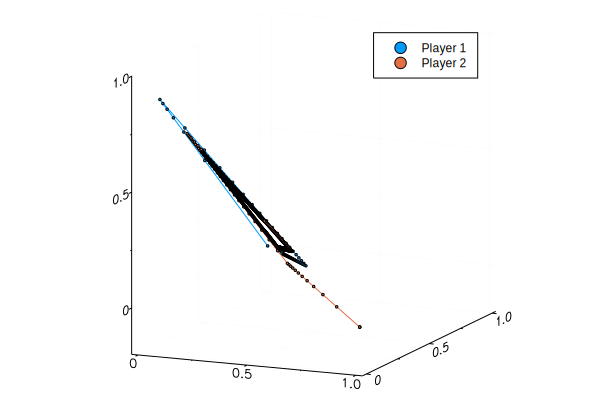

In [13]:
initialize!(sg,(1,2))

ts_length = 1000
assessment_series = Array{Real}(undef, ts_length, 3, 2)
for t in 1:ts_length
    for i in 1:2
        for a in 1:3
            assessment_series[t, a, i] = sg.x[i][1][a]
        end
    end
    play!(sg)
end
X = [assessment_series[:, 1, 1], assessment_series[:, 1, 2]]
Y = [assessment_series[:, 2, 1], assessment_series[:, 2, 2]]
Z = [assessment_series[:, 3, 1], assessment_series[:, 3, 2]]
labels = ["Player 1", "Player 2"]
plot(X,Y,Z, label=labels, marker=:circle, markersize=1)

## FictitiousPlay with constant gain

In [14]:
matching_pennies_bimatrix = Array{Float64}(undef, 2, 2, 2)
matching_pennies_bimatrix[:, 1, 1] = [1, -1]
matching_pennies_bimatrix[:, 1, 2] = [-1, 1]
matching_pennies_bimatrix[:, 2, 1] = [-1, 1]
matching_pennies_bimatrix[:, 2, 2] = [1, -1]
g = NormalFormGame(matching_pennies_bimatrix)

2×2 NormalFormGame{2,Float64}

In [15]:
step_size = size -> 0.01
fp = FictitiousPlay(g, (1,1), step_size)
println(fp.g)
println(fp.step_size)
println(fp.x)
println(fp.t)

2×2 NormalFormGame{2,Float64}
getfield(Main, Symbol("##29#30"))()
(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
1


In [16]:
for t in 1:10
    println(fp.x)
    play!(fp)
end

(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.99, 0.01]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.9801, 0.0199]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.970299, 0.029701]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.960596, 0.039404]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.95099, 0.04901]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.94148, 0.0585199]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.932065, 0.0679347]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.922745, 0.0772553]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.913517, 0.0864828]], Array{Float64,1}[[1.0, 0.0]])


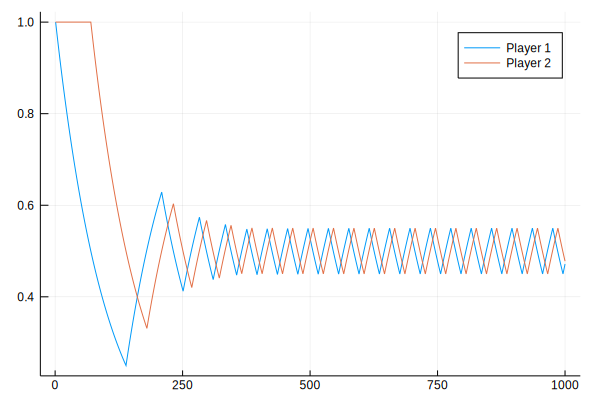

In [17]:
initialize!(fp,(1,1))

ts_length = 1000
assessment_series = Array{Real}(undef, ts_length, 2)
for t in 1:ts_length
    for i in 1:2
        assessment_series[t, i] = fp.x[i][1][1]
    end
    play!(fp)
end
assessment = [assessment_series[:,1], assessment_series[:,2]]
labels = ["Player 1", "Player 2"]
plot(assessment, label=labels)

# StochasticFictitiousPlay

## StochasticFictitiousPlay with decreasing gain

In [18]:
normal = Normal()
sfp = StochasticFictitiousPlay(g, normal, (1,1))
println(sfp.g)
println(sfp.step_size)
println(sfp.distribution)
println(sfp.x)
println(sfp.t)

2×2 NormalFormGame{2,Float64}
getfield(Main, Symbol("##13#16"))()
Normal{Float64}(μ=0.0, σ=1.0)
(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
1


In [19]:
for t in 1:10
    println(sfp.x)
    play!(sfp)
end

(Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.5, 0.5]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.333333, 0.666667]], Array{Float64,1}[[1.0, 0.0]])
(Array{Float64,1}[[0.25, 0.75]], Array{Float64,1}[[0.75, 0.25]])
(Array{Float64,1}[[0.2, 0.8]], Array{Float64,1}[[0.6, 0.4]])
(Array{Float64,1}[[0.333333, 0.666667]], Array{Float64,1}[[0.666667, 0.333333]])
(Array{Float64,1}[[0.285714, 0.714286]], Array{Float64,1}[[0.571429, 0.428571]])
(Array{Float64,1}[[0.25, 0.75]], Array{Float64,1}[[0.5, 0.5]])
(Array{Float64,1}[[0.222222, 0.777778]], Array{Float64,1}[[0.555556, 0.444444]])
(Array{Float64,1}[[0.2, 0.8]], Array{Float64,1}[[0.5, 0.5]])


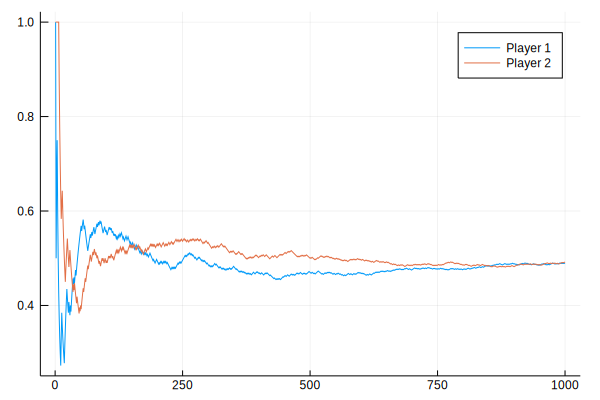

In [20]:
initialize!(sfp,(1,1))

ts_length = 1000
assessment_series = Array{Real}(undef, ts_length, 2)
for t in 1:ts_length
    for i in 1:2
        assessment_series[t, i] = sfp.x[i][1][1]
    end
    play!(sfp)
end
assessment = [assessment_series[:,1], assessment_series[:,2]]
labels = ["Player 1", "Player 2"]
plot(assessment, label=labels)

In [21]:
shapley_game = Array{Int}(undef, 3, 3, 2)
shapley_game[:, 1, 1] = [0, 0, 1]
shapley_game[:, 2, 1] = [1, 0, 0]
shapley_game[:, 3, 1] = [0, 1, 0]
shapley_game[:, 1, 2] = [0, 1, 0]
shapley_game[:, 2, 2] = [0, 0, 1]
shapley_game[:, 3, 2] = [1, 0, 0]
g = NormalFormGame(shapley_game)

3×3 NormalFormGame{2,Int64}

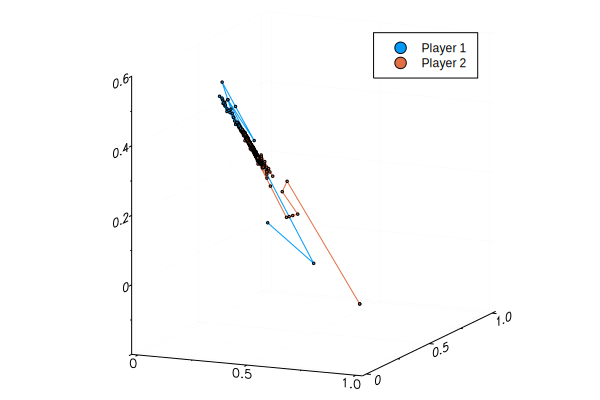

In [22]:
sg = StochasticFictitiousPlay(g, normal, (1,2))

ts_length = 1000
assessment_series = Array{Real}(undef, ts_length, 3, 2)
for t in 1:ts_length
    for i in 1:2
        for a in 1:3
            assessment_series[t, a, i] = sg.x[i][1][a]
        end
    end
    play!(sg)
end
X = [assessment_series[:, 1, 1], assessment_series[:, 1, 2]]
Y = [assessment_series[:, 2, 1], assessment_series[:, 2, 2]]
Z = [assessment_series[:, 3, 1], assessment_series[:, 3, 2]]
labels = ["Player 1", "Player 2"]
plot(X,Y,Z, label=labels, marker=:circle, markersize=1)

## StochasticFictitiousPlay with constant gain

In [23]:
normal = Normal()
step_size = size -> 0.01
sfp = StochasticFictitiousPlay(g, normal, (1,1), step_size)
println(sfp.g)
println(sfp.step_size)
println(sfp.distribution)
println(sfp.x)
println(sfp.t)

3×3 NormalFormGame{2,Int64}
getfield(Main, Symbol("##31#32"))()
Normal{Float64}(μ=0.0, σ=1.0)
(Array{Float64,1}[[1.0, 0.0, 0.0]], Array{Float64,1}[[1.0, 0.0, 0.0]])
1


In [24]:
for t in 1:10
    println(sfp.x)
    play!(sfp)
end

(Array{Float64,1}[[1.0, 0.0, 0.0]], Array{Float64,1}[[1.0, 0.0, 0.0]])
(Array{Float64,1}[[0.99, 0.0, 0.01]], Array{Float64,1}[[0.99, 0.0, 0.01]])
(Array{Float64,1}[[0.9901, 0.0, 0.0099]], Array{Float64,1}[[0.9801, 0.01, 0.0099]])
(Array{Float64,1}[[0.980199, 0.0, 0.019801]], Array{Float64,1}[[0.970299, 0.0099, 0.019801]])
(Array{Float64,1}[[0.980397, 0.0, 0.019603]], Array{Float64,1}[[0.960596, 0.009801, 0.029603]])
(Array{Float64,1}[[0.980593, 0.0, 0.019407]], Array{Float64,1}[[0.95099, 0.00970299, 0.039307]])
(Array{Float64,1}[[0.970787, 0.0, 0.0292129]], Array{Float64,1}[[0.95148, 0.00960596, 0.0389139]])
(Array{Float64,1}[[0.971079, 0.0, 0.0289208]], Array{Float64,1}[[0.941965, 0.0095099, 0.0485248]])
(Array{Float64,1}[[0.961368, 0.0, 0.0386316]], Array{Float64,1}[[0.942546, 0.0094148, 0.0480395]])
(Array{Float64,1}[[0.951755, 0.0, 0.0482452]], Array{Float64,1}[[0.93312, 0.0193207, 0.0475591]])


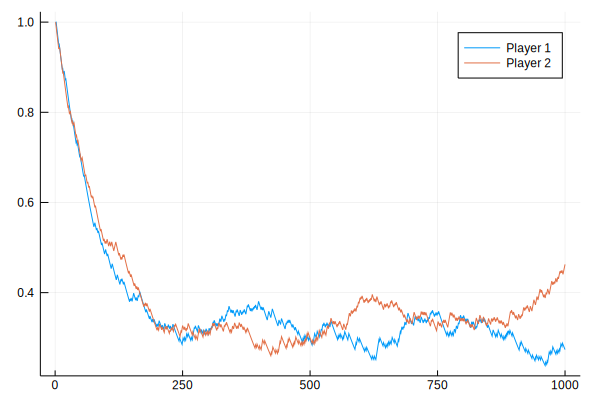

In [25]:
initialize!(sfp,(1,1))

ts_length = 1000
assessment_series = Array{Real}(undef, ts_length, 2)
for t in 1:ts_length
    for i in 1:2
        assessment_series[t, i] = sfp.x[i][1][1]
    end
    play!(sfp)
end
assessment = [assessment_series[:,1], assessment_series[:,2]]
labels = ["Player 1", "Player 2"]
plot(assessment, label=labels)

In [26]:
coordination_game_matrix = [4 0; 3 2]
g = NormalFormGame(coordination_game_matrix)
normal = Normal(0, 0.5)
step_size = size -> 0.01
sf = StochasticFictitiousPlay(g, normal, (1,1), step_size)

StochasticFictitiousPlay{2}(2×2 NormalFormGame{2,Int64}, getfield(Main, Symbol("##33#34"))(), Normal{Float64}(μ=0.0, σ=0.5), (Array{Float64,1}[[1.0, 0.0]], Array{Float64,1}[[1.0, 0.0]]), 1)

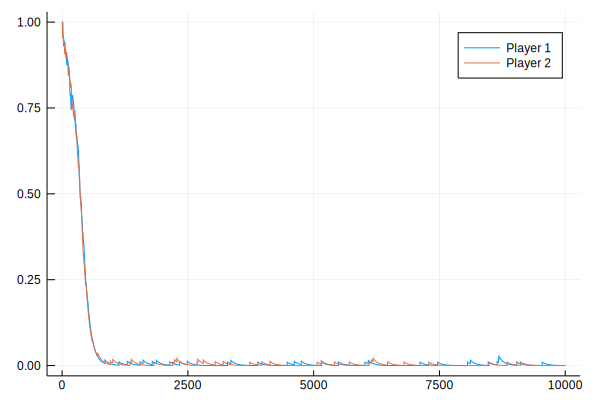

In [27]:
ts_length = 10000
assessment_series = Array{Real}(undef, ts_length, 2)
for t in 1:ts_length
    for i in 1:2
        assessment_series[t, i] = sf.x[i][1][1]
    end
    play!(sf)
end
assessment = [assessment_series[:,1], assessment_series[:,2]]
labels = ["Player 1", "Player 2"]
plot(assessment, label=labels)

In [28]:
e = 1
game = [11 11 0; 11-e 11-e 10-e; 3 10 10]
g = NormalFormGame(game)
normal = Normal(0,0.5)
step_size = size -> 0.1
sf = StochasticFictitiousPlay(g, normal, (3,3))

StochasticFictitiousPlay{2}(3×3 NormalFormGame{2,Int64}, getfield(Main, Symbol("##13#16"))(), Normal{Float64}(μ=0.0, σ=0.5), (Array{Float64,1}[[0.0, 0.0, 1.0]], Array{Float64,1}[[0.0, 0.0, 1.0]]), 1)

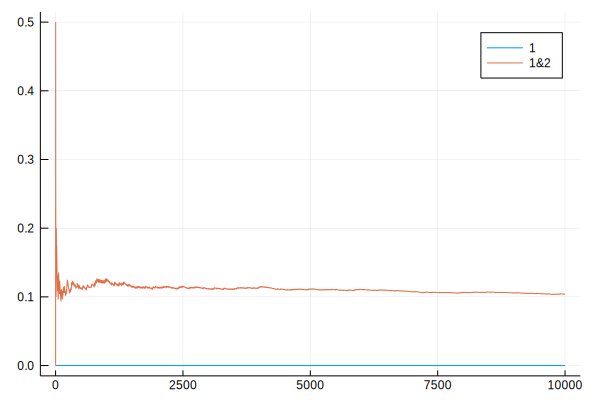

In [29]:
ts_length = 10000
assessment_series = Array{Float64}(undef, ts_length, 2)
for t in 1:ts_length
    assessment_series[t, 1] = sf.x[1][1][1]
    assessment_series[t, 2] = sf.x[1][1][1] + sf.x[1][1][2]
    play!(sf)
end
assessment = [assessment_series[:,1], assessment_series[:,2]]
labels = ["1", "1&2"]
plot(assessment, label=labels)
#なんで0になる？？？

# N-player Game

In [30]:

"""
    function cournot(a::Real, c::Real, ::Val{N}, q_grid::Vector{T})

# Arguments

- `a::Real` : Intercept of the demand curve
- `c::Real` : Common constant marginal cost
- `::Val{N}` : Number of players
- `q_grid::Vector{T}` : Vector containing the set of possible quantities

# Return

- `::NormalFormGame` : `NormalFormGame` instance which represents Cournot game

"""
function cournot(a::Real, c::Real, ::Val{N}, q_grid::Vector{T}) where {N,T<:Real}
    nums_actions = ntuple(x->length(q_grid), Val(N))
    S = promote_type(typeof(a), typeof(c), T)
    payoff_array= Array{S}(undef, nums_actions)
    x = [q_grid for i in 1:N]
    Cartesian = collect(Iterators.product(x...))
    for I in CartesianIndices(size(Cartesian))
        payoff_array[I] = (a - c - sum(Cartesian[I])) * Cartesian[I][1]
    end
    players = ntuple(x->Player(payoff_array), Val(N))
    return NormalFormGame(players)
end

cournot

In [31]:
a, c = 80, 20
N = 3
q_grid = [10, 15]  # [1/3 of Monopoly quantity, Nash equilibrium quantity]

g_Cou = cournot(a, c, Val(N), q_grid)

2×2×2 NormalFormGame{3,Int64}

In [32]:
init_actions = (1,1,1)
fp_Cou = FictitiousPlay(g_Cou, init_actions)

FictitiousPlay{3}(2×2×2 NormalFormGame{3,Int64}, getfield(Main, Symbol("##5#8"))(), (Array{Float64,1}[[1.0, 0.0], [1.0, 0.0]], Array{Float64,1}[[1.0, 0.0], [1.0, 0.0]], Array{Float64,1}[[1.0, 0.0], [1.0, 0.0]]), 1)

In [33]:
for t in 1:5
    println(fp_Cou.x)
    play!(fp_Cou)
end

(Array{Float64,1}[[1.0, 0.0], [1.0, 0.0]], Array{Float64,1}[[1.0, 0.0], [1.0, 0.0]], Array{Float64,1}[[1.0, 0.0], [1.0, 0.0]])
(Array{Float64,1}[[0.5, 0.5], [0.5, 0.5]], Array{Float64,1}[[0.5, 0.5], [0.5, 0.5]], Array{Float64,1}[[0.5, 0.5], [0.5, 0.5]])
(Array{Float64,1}[[0.333333, 0.666667], [0.333333, 0.666667]], Array{Float64,1}[[0.333333, 0.666667], [0.333333, 0.666667]], Array{Float64,1}[[0.333333, 0.666667], [0.333333, 0.666667]])
(Array{Float64,1}[[0.25, 0.75], [0.25, 0.75]], Array{Float64,1}[[0.25, 0.75], [0.25, 0.75]], Array{Float64,1}[[0.25, 0.75], [0.25, 0.75]])
(Array{Float64,1}[[0.2, 0.8], [0.2, 0.8]], Array{Float64,1}[[0.2, 0.8], [0.2, 0.8]], Array{Float64,1}[[0.2, 0.8], [0.2, 0.8]])


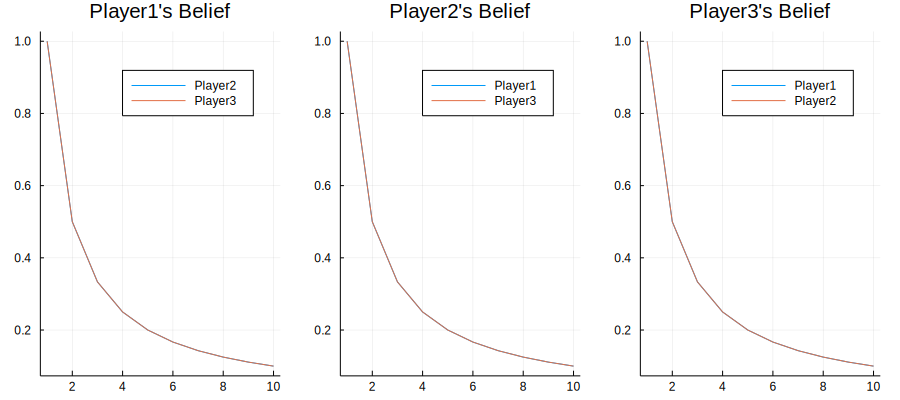

In [34]:
initialize!(fp_Cou, init_actions)
ts_length = 10
assessment_series = Array{Real}(undef, ts_length, 3, 2)
for t in 1:ts_length
    for i in 1:3
        for j in 1:2
            assessment_series[t, i, j] = fp_Cou.x[i][j][1]
        end
    end
    play!(fp_Cou)
end

p1 = plot(
    plot([assessment_series[:,1,1], assessment_series[:,1, 2]]),
    label=["Player2", "Player3"],
    title="Player1's Belief"
)
p2 = plot(
    plot([assessment_series[:,2,1], assessment_series[:,2,2]]),
    label=["Player1", "Player3"],
    title="Player2's Belief"
)
p3 = plot(
    plot([assessment_series[:,3,1], assessment_series[:,3,2]]),
    label=["Player1", "Player2"],
    title="Player3's Belief"
)
plot(p1,p2,p3, layout=(1,3), size=(900,400))

---

In [35]:
coordination_bimatrix = Array{Float64}(undef, 2, 2, 2)
coordination_bimatrix[:, 1, 1] = [3, 3]
coordination_bimatrix[:, 1, 2] = [2, 0]
coordination_bimatrix[:, 2, 1] = [0, 2]
coordination_bimatrix[:, 2, 2] = [4, 4]
cg = NormalFormGame(coordination_bimatrix)

2×2 NormalFormGame{2,Float64}

In [36]:
normal = Normal()
step_size = size -> 0.3
scg = StochasticFictitiousPlay(cg, normal, ([0.4,0.6],[0.4,0.6]), step_size)

StochasticFictitiousPlay{2}(2×2 NormalFormGame{2,Float64}, getfield(Main, Symbol("##43#44"))(), Normal{Float64}(μ=0.0, σ=1.0), (Array{Float64,1}[[0.4, 0.6]], Array{Float64,1}[[0.4, 0.6]]), 1)

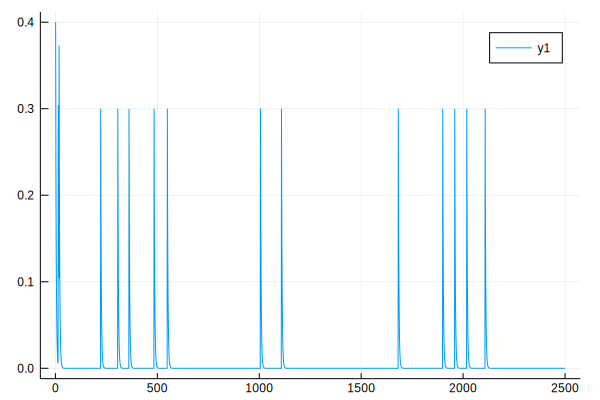

In [37]:
initialize!(scg, ([0.4,0.6],[0.4,0.6]))

ts_length = 2500
assessment_series = Vector{Real}(undef, ts_length)
for t in 1:ts_length
    assessment_series[t] = scg.x[1][1][1]
    play!(scg)
end
plot(assessment_series)